#### Imports

In [1]:
# Visualization
import matplotlib.pyplot as plt

# Builtin
from pathlib import Path
import sys
from math import nan
from itertools import islice
import subprocess
import pdb

# This computer git repos
from project.project_manager_module import ProjectManager

#### Build paths

In [2]:
root_path = r"C:\Users\Simo\Laskenta\Models"
project = "FCN22"  
experiment = "single_files"  
path = Path.joinpath(Path(root_path), Path(project), experiment)

#### Input context

In [3]:
input_folder = "../in"
matlab_workspace_file = "matlab_workspace_SingleSpike.mat"
conn_skeleton_file_in = "Replica_skeleton_connections_20210211_1453238_L4_SS.gz"
conn_file_out = "connections_SingleSpike_ci.gz"
input_filename = "noise_210406_SingleSpike.mat"  

#### Data context for single files and arrays 
These midpoint and parameter strings are used only in this module.

In [4]:
midpoint = "Comrad"  # HiFi, Comrad, Bacon
parameter = "midpoint"
output_folder = f"{midpoint}_{parameter}"

#### Analysis context
t_idx_start cuts the beginning and t_idx_end the end of time samples. Use 0, None or integer btw [0 N_time_samples]. If negative, will count from the end.
NG_output is the output neuron group [number_layer_group_subgroup]

In [5]:
t_idx_start = 2000
t_idx_end = -2000
NG_output = "NG3_L4_SS_L4"

#### Call project manager
Code complexity is hidden behind the ProjectManager

In [6]:
PM = ProjectManager(
    path=path,
    input_folder=input_folder,
    output_folder=output_folder,
    matlab_workspace_file=matlab_workspace_file,
    conn_skeleton_file_in=conn_skeleton_file_in,
    conn_file_out=conn_file_out,
    input_filename=input_filename,
    NG_name=NG_output,
    t_idx_start=t_idx_start,
    t_idx_end=t_idx_end,
    project=project,
    experiment=experiment,
)

No to_mpa_dict in conf file. Only one file will be processed.


#### Run CxSystem2 for single file
You need the project path and output folder set to anat file
You need the in-path and file name set correctly to phys file

In [7]:
ana_file_name = "Anat_FCN22_Comrad_221122_midpoint.csv"
ana_file_fullpath = path.joinpath(ana_file_name)
phys_file_name = "Phys_FCN22_Comrad_221122_midpoint.csv"
phys_file_fullpath = path.joinpath(phys_file_name)

command_and_args = [
    "cxsystem2", 
    "-a", 
    str(ana_file_fullpath), 
    "-p", 
    str(phys_file_fullpath)
]

subprocess.run(command_and_args, text=True, encoding="utf-8")

CompletedProcess(args=['cxsystem2', '-a', 'C:\\Users\\Simo\\Laskenta\\Models\\FCN22\\single_files\\Anat_FCN22_Comrad_221122_midpoint.csv', '-p', 'C:\\Users\\Simo\\Laskenta\\Models\\FCN22\\single_files\\Phys_FCN22_Comrad_221122_midpoint.csv'], returncode=0)

### Analyze and visualize the results for single files

#### Show input and data. 
If  file_to_display = None, the function selects the most recent data file in output_folder.


Loaded file C:\Users\Simo\Laskenta\Models\FCN22\single_files\Comrad_midpoint\Comrad_midpoint_results_20221123_1503044.gz
Loaded file C:\Users\Simo\Laskenta\Models\FCN22\single_files\..\in\noise_210406_SingleSpike.mat


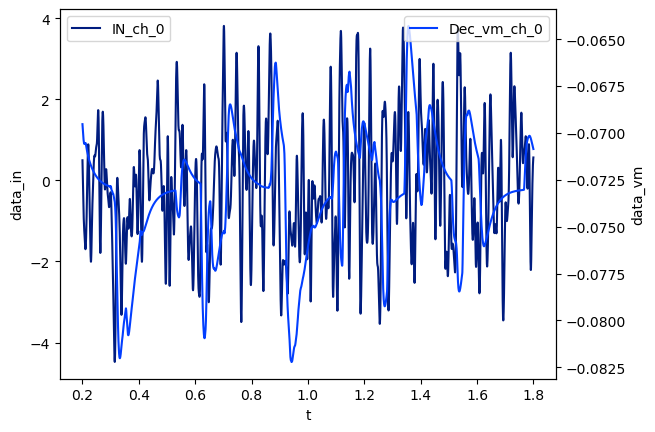

In [8]:
# file_to_display = r"[your/full/path/to/datafile].gz"  
file_to_display = None # Most recent

PM.viz.show_readout_on_input(
    results_filename=file_to_display, 
    normalize=False, 
    unit_idx_list=[0], 
    savefigname=''
)

Best possible outputsignal, given the leaky spikes in the readout group

Loaded file C:\Users\Simo\Laskenta\Models\FCN22\single_files\..\in\noise_210406_SingleSpike.mat
Loaded file C:\Users\Simo\Laskenta\Models\FCN22\single_files\Comrad_midpoint\Comrad_midpoint_results_20221123_1503044.gz


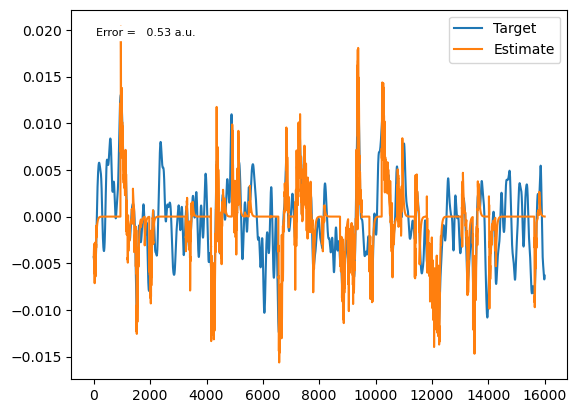

In [9]:
PM.viz.show_estimate_on_input(
    results_filename=file_to_display, 
    simulation_engine='cxsystem', 
    readout_group='E', 
    unit_idx_list=[2]) # Simulation engines: 'cxsystem'. Readout_groups 'E','I'.

Loaded file C:\Users\Simo\Laskenta\Models\FCN22\single_files\Comrad_midpoint\Comrad_midpoint_results_20221123_1503044.gz
Loaded file C:\Users\Simo\Laskenta\Models\FCN22\single_files\..\in\noise_210406_SingleSpike.mat


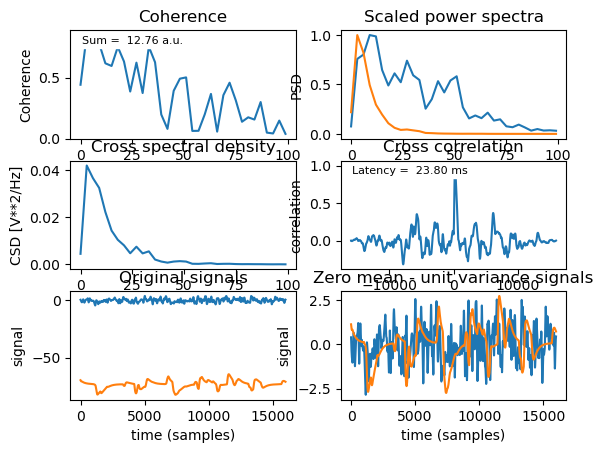

In [ ]:
PM.viz.show_input_to_readout_coherence(
    results_filename=file_to_display, 
    savefigname='',
    signal_pair=[0,0]) 

### Show spikes

Loaded file C:\Users\Simo\Laskenta\Models\FCN22\single_files\Comrad_midpoint\Comrad_midpoint_results_20221123_1503044.gz
['NG0_relay_vpm', 'NG1_L4_CI_SS_L4', 'NG2_L4_CI_BC_L4', 'NG3_L4_SS_L4']


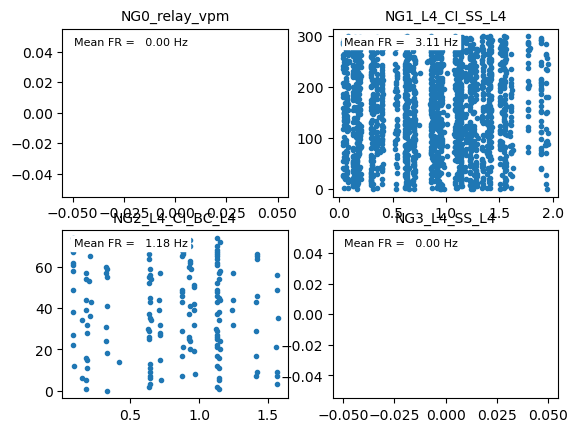

In [ ]:
PM.viz.show_spikes(results_filename=file_to_display, savefigname='')

### Show membrane voltage

Loaded file C:\Users\Simo\Laskenta\Models\FCN22\single_files\Comrad_midpoint\Comrad_midpoint_results_20221123_1503044.gz
['NG3_L4_SS_L4']


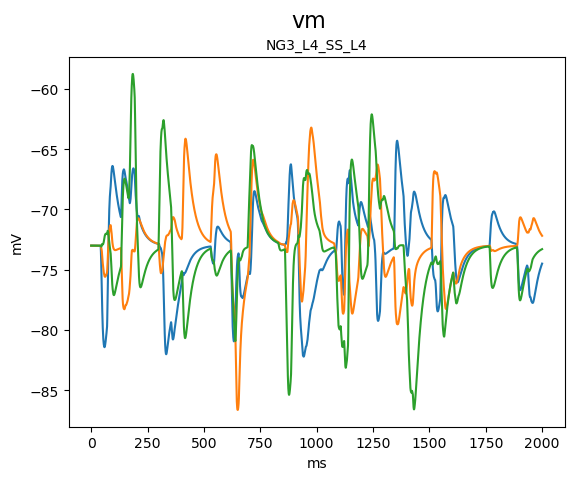

In [14]:
neuron_index = {"NG3_L4_SS_L4": [0, 1, 2]} # Only three neurons are monitored
PM.viz.show_analog_results(
    results_filename=file_to_display,
    savefigname="",
    param_name="vm",
    startswith="NG3",
    neuron_index=neuron_index,
)

### Show adaptation current

Loaded file C:\Users\Simo\Laskenta\Models\FCN22\single_files\Comrad_midpoint\Comrad_midpoint_results_20221123_1503044.gz
['NG2_L4_CI_BC_L4']


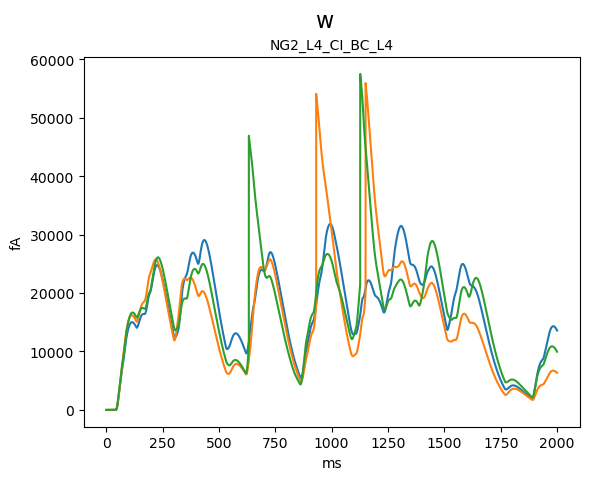

In [ ]:
PM.viz.show_analog_results(
    results_filename=file_to_display,
    savefigname="",
    param_name="w",
    startswith="NG2",
    neuron_index=neuron_index,
)